In [4]:
from Transformation.Dataset import BootDataset
import yaml
from matplotlib import pyplot as plt
from torch.optim import AdamW
from torch.nn import BCELoss
import torch
import segmentation_models_pytorch as smp
from torch.utils.data import DataLoader
option_path=fr'D:/Code/KD_Summer_Work/config.yml'

with open(option_path,'r') as file_option:
    option=yaml.safe_load(file_option)

dataset=BootDataset(option['Trans']['data_path'])
dataloader=DataLoader(dataset=dataset,batch_size=16,drop_last=False,shuffle=True)
segm_model=smp.Unet('mobilenet_v2', encoder_weights='imagenet', classes=1, activation=None, encoder_depth=5, decoder_channels=[256, 128, 64, 32, 16])
loss_fn=BCELoss()
optimizer=AdamW(segm_model.parameters(),lr=0.001)

try:
    weights_dict=torch.load(option['Segmentation']['weights_path'],weights_only=True)
    segm_model.load_state_dict(weights_dict)
except:
    print('Весов нет, инициализируем новые')

In [13]:
resilt=dataset[7]['start_img']

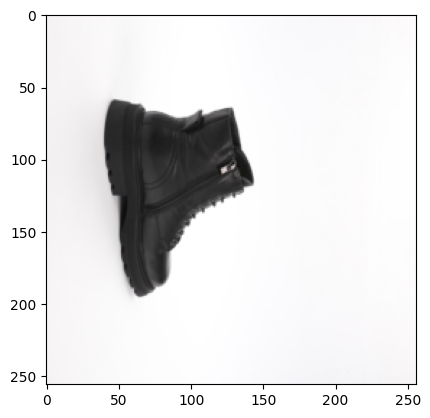

In [ ]:
plt.imshow(resilt.permute(1,2,0).detach().numpy())  